In [1]:
import tensorflow as tf
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
def extract_images_from_folder(root_folder, target_size=(256, 256)):
    image_data = []
    labels = []
    label_to_index = {}  # Dictionary to map label names to numerical indices
    index = 0

    for subdir, dirs, files in os.walk(root_folder):
        for file in tqdm(files):
            filepath = os.path.join(subdir, file)
            img = cv2.imread(filepath)
            img = cv2.resize(img, target_size)

            label = os.path.basename(subdir)
            if label not in label_to_index:
                label_to_index[label] = index
                index += 1

            image_data.append(img)
            labels.append(label_to_index[label])

    image_data = np.array(image_data)
    labels = np.array(labels)

    return image_data, labels, label_to_index

In [3]:
root_folder = "Plant diseases dataset\Train\Train"
x_train,y_train,label_reverse_train = extract_images_from_folder(root_folder)

0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 434/434 [01:35<00:00,  4.56it/s]


In [4]:
root_folder = "Plant diseases dataset\Validation\Validation"
x_val,y_val,label_reverse_val = extract_images_from_folder(root_folder)

0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.39it/s]


In [5]:
root_folder = "Plant diseases dataset\Test\Test"
x_test,y_test,label_reverse_test = extract_images_from_folder(root_folder)

0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:09<00:00,  5.08it/s]


In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_reverse_train), activation='softmax')
])

C:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/3
42/42 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.4637 - loss: 1.2874 - val_accuracy: 0.6833 - val_loss: 0.7032
Epoch 2/3
42/42 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.7974 - loss: 0.4977 - val_accuracy: 0.6333 - val_loss: 0.9097
Epoch 3/3
42/42 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.8315 - loss: 0.4438 - val_accuracy: 0.8833 - val_loss: 0.4233


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 421ms/step - accuracy: 0.8728 - loss: 0.4742
Test accuracy: 0.8333333134651184


In [12]:
#https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset

In [13]:
predictions = model.predict(x_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


In [14]:
labels=["Healthy","Powdery","Rust"]
import numpy as np
label = labels[np.argmax(predictions)]

Healthy


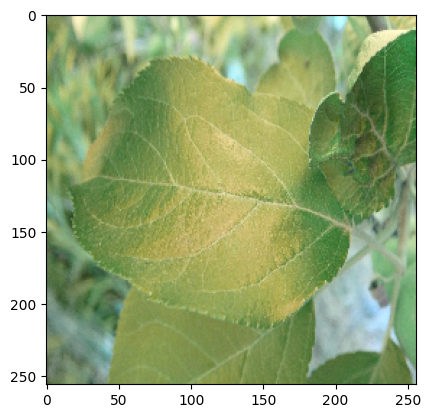

In [15]:
import matplotlib.pyplot as plt
print(label)
plt.imshow(x_test[:1][0])
plt.show()